In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('diabetes.csv')
data = data.dropna()
data = data.drop(columns=['blood_glucose_level'])
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = pd.Categorical(data[col]).codes
classification = 'diabetes'
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,0
1,0,54.0,0,0,0,27.32,6.6,0
2,1,28.0,0,0,4,27.32,5.7,0
3,0,36.0,0,0,1,23.45,5.0,0
4,1,76.0,1,1,1,20.14,4.8,0
...,...,...,...,...,...,...,...,...
14252,1,38.0,0,0,0,23.01,4.8,0
14253,0,21.0,0,0,4,25.68,3.5,0
14254,1,26.0,0,0,4,27.32,6.1,0
14255,0,24.0,0,0,1,22.05,6.5,0


In [6]:
X = data.drop(columns=classification)
Y = data[classification]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [8]:
models = []
for L in ['l1', 'l2']:
  for C in [1, 100, 0.01]:
    model = LogisticRegression(penalty=L, C=C, solver='liblinear') # type: ignore
    model.fit(X_train, Y_train)
    models.append(model)
    print(f'\npenalty = {L}, C = {C}:')
    print('Правильность на обучающем наборе: {:.4f}'.format(model.score(X_train, Y_train)))
    print('Правильность на тестовом наборе: {:.4f}'.format(model.score(X_test, Y_test)))


penalty = l1, C = 1:
Правильность на обучающем наборе: 0.9468
Правильность на тестовом наборе: 0.9502

penalty = l1, C = 100:
Правильность на обучающем наборе: 0.9470
Правильность на тестовом наборе: 0.9506

penalty = l1, C = 0.01:
Правильность на обучающем наборе: 0.9247
Правильность на тестовом наборе: 0.9257

penalty = l2, C = 1:
Правильность на обучающем наборе: 0.9443
Правильность на тестовом наборе: 0.9488

penalty = l2, C = 100:
Правильность на обучающем наборе: 0.9470
Правильность на тестовом наборе: 0.9506

penalty = l2, C = 0.01:
Правильность на обучающем наборе: 0.9144
Правильность на тестовом наборе: 0.9148


In [9]:
best_lr_model = models[1]
print('Модель с penalty = l1, C = 100:')
Y_pred = best_lr_model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('\nМатрица ошибок:')
print(confusion_matrix(Y_test, Y_pred))

Модель с penalty = l1, C = 100:
Accuracy: 0.95
Precision: 0.86
Recall: 0.50

Матрица ошибок:
[[2590   19]
 [ 122  121]]


In [10]:
model_SVC = SVC(C=1, gamma=0.2)
SVC_params = {'C': [1], 'gamma': [0.2, 0.6, 1]}
SVC_grid = GridSearchCV(model_SVC, SVC_params, cv=5, n_jobs=-1)
SVC_grid.fit(X_train, Y_train)
print('Наилучшая комбинация параметров:', SVC_grid.best_params_)
print('Наилучший результат: {:.2f}'.format(SVC_grid.best_score_))

best_svc_model = SVC(**SVC_grid.best_params_)
best_svc_model.fit(X_train, Y_train)
print('\nПравильность на обучающем наборе: {:.2f}'.format(best_svc_model.score(X_train, Y_train)))
print('Правильность на тестовом наборе: {:.2f}'.format(best_svc_model.score(X_test, Y_test)))

Y_pred = best_svc_model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('\nМатрица ошибок:')
print(confusion_matrix(Y_test, Y_pred))

Наилучшая комбинация параметров: {'C': 1, 'gamma': 0.2}
Наилучший результат: 0.93

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.93
Accuracy: 0.93
Precision: 0.82
Recall: 0.26

Матрица ошибок:
[[2595   14]
 [ 180   63]]


In [11]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, Y_train)
Y_train_tree_pred = tree.predict(X_train)
Y_test_tree_pred = tree.predict(X_test)
print('Правильность дерева на обучающих данных: {:.2f}'.format(accuracy_score(Y_train, Y_train_tree_pred)))
print('Правильность дерева на тестовых данных: {:.2f}'.format(accuracy_score(Y_test, Y_test_tree_pred)))

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_train_knn_pred = knn.predict(X_train)
Y_test_knn_pred = knn.predict(X_test)
print('Правильность KNN на обучающих данных: {:.2f}'.format(accuracy_score(Y_train, Y_train_knn_pred)))
print('Правильность KNN на тестовых данных: {:.2f}'.format(accuracy_score(Y_test, Y_test_knn_pred)))

Правильность дерева на обучающих данных: 1.00
Правильность дерева на тестовых данных: 0.93
Правильность KNN на обучающих данных: 0.94
Правильность KNN на тестовых данных: 0.93


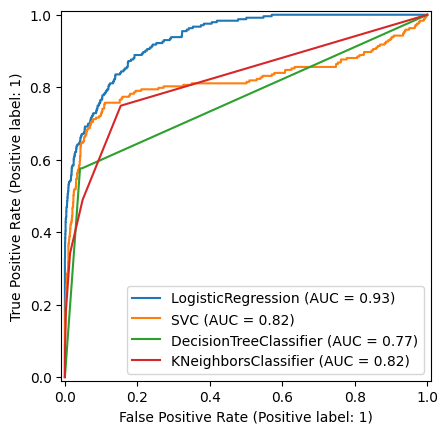

In [12]:
ax = plt.gca()
RocCurveDisplay.from_estimator(best_lr_model, X_test, Y_test, ax=ax)
RocCurveDisplay.from_estimator(best_svc_model, X_test, Y_test, ax=ax)
RocCurveDisplay.from_estimator(tree, X_test, Y_test, ax=ax)
RocCurveDisplay.from_estimator(knn, X_test, Y_test, ax=ax)
plt.legend(loc="lower right")
plt.show()